# Music Data Analysis

En este notebook vamos a extraer información de metadata sobre un dataset de 6.000 canciones a través de la API de spotify. La explicación y el walkthrough del mismo la podéis encontrar [aquí](https://visiondefunnel.com/2021/05/21/suenan-los-androides-con-generos-musicales). En general, lo que queremos es entender cómo reaccionan los clusters del algoritmo K-Means con un conjunto de datos que describen númericamente esas canciones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
path_to_data = "songs_with_audio_features.csv"
data = pd.read_csv(path_to_data, index_col=False, delimiter=";")
data.head()

,track_name,id,album_name,artist_name,popularity,decade,genre,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Dreams - 2004 Remaster,0ofHAoxe9vBkTCp2UQIavz,Rumours (Super Deluxe),Fleetwood Mac,85,1970,"['album rock', 'classic rock', 'mellow gold', ...",0.828,0.492,0,...,0.004280,0.1280,0.789,120.151,audio_features,spotify:track:0ofHAoxe9vBkTCp2UQIavz,https://api.spotify.com/v1/tracks/0ofHAoxe9vBk...,https://api.spotify.com/v1/audio-analysis/0ofH...,257800,4
1,The Chain - 2004 Remaster,5e9TFTbltYBg2xThimr0rU,Rumours (Super Deluxe),Fleetwood Mac,82,1970,"['album rock', 'classic rock', 'mellow gold', ...",0.545,0.670,9,...,0.000822,0.0451,0.481,151.553,audio_features,spotify:track:5e9TFTbltYBg2xThimr0rU,https://api.spotify.com/v1/tracks/5e9TFTbltYBg...,https://api.spotify.com/v1/audio-analysis/5e9T...,270213,4
2,Sweet Home Alabama,7e89621JPkKaeDSTQ3avtg,Second Helping,Lynyrd Skynyrd,82,1970,"['album rock', 'blues rock', 'classic rock', '...",0.596,0.605,7,...,0.000331,0.0863,0.886,97.798,audio_features,spotify:track:7e89621JPkKaeDSTQ3avtg,https://api.spotify.com/v1/tracks/7e89621JPkKa...,https://api.spotify.com/v1/audio-analysis/7e89...,283800,4
3,Hotel California - 2013 Remaster,40riOy7x9W7GXjyGp4pjAv,Hotel California (2013 Remaster),Eagles,83,1970,"['album rock', 'classic rock', 'country rock',...",0.579,0.508,2,...,0.000494,0.0575,0.609,147.125,audio_features,spotify:track:40riOy7x9W7GXjyGp4pjAv,https://api.spotify.com/v1/tracks/40riOy7x9W7G...,https://api.spotify.com/v1/audio-analysis/40ri...,391376,4
4,Mr. Blue Sky,2RlgNHKcydI9sayD2Df2xp,Out of the Blue,Electric Light Orchestra,81,1970,"['album rock', 'art rock', 'beatlesque', 'bow ...",0.388,0.338,10,...,0.000004,0.2480,0.478,177.765,audio_features,spotify:track:2RlgNHKcydI9sayD2Df2xp,https://api.spotify.com/v1/tracks/2RlgNHKcydI9...,https://api.spotify.com/v1/audio-analysis/2Rlg...,303373,4


In [3]:
data['genre'] = data['genre'].str.replace("'", "")
data['genre'] = data['genre'].str.replace("[", "").str.replace("]", "")
data['genre'] = data['genre'].str.strip(' ').str.split(',')

data = data.explode('genre', ignore_index=True)
data.head()

<ipython-input-3-2e2701e8e382>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  data['genre'] = data['genre'].str.replace("[", "").str.replace("]", "")


,track_name,id,album_name,artist_name,popularity,decade,genre,danceability,energy,key,...,instrumentalness,liveness,valence,tempo,type,uri,track_href,analysis_url,duration_ms,time_signature
0,Dreams - 2004 Remaster,0ofHAoxe9vBkTCp2UQIavz,Rumours (Super Deluxe),Fleetwood Mac,85,1970,album rock,0.828,0.492,0,...,0.00428,0.128,0.789,120.151,audio_features,spotify:track:0ofHAoxe9vBkTCp2UQIavz,https://api.spotify.com/v1/tracks/0ofHAoxe9vBk...,https://api.spotify.com/v1/audio-analysis/0ofH...,257800,4
1,Dreams - 2004 Remaster,0ofHAoxe9vBkTCp2UQIavz,Rumours (Super Deluxe),Fleetwood Mac,85,1970,classic rock,0.828,0.492,0,...,0.00428,0.128,0.789,120.151,audio_features,spotify:track:0ofHAoxe9vBkTCp2UQIavz,https://api.spotify.com/v1/tracks/0ofHAoxe9vBk...,https://api.spotify.com/v1/audio-analysis/0ofH...,257800,4
2,Dreams - 2004 Remaster,0ofHAoxe9vBkTCp2UQIavz,Rumours (Super Deluxe),Fleetwood Mac,85,1970,mellow gold,0.828,0.492,0,...,0.00428,0.128,0.789,120.151,audio_features,spotify:track:0ofHAoxe9vBkTCp2UQIavz,https://api.spotify.com/v1/tracks/0ofHAoxe9vBk...,https://api.spotify.com/v1/audio-analysis/0ofH...,257800,4
3,Dreams - 2004 Remaster,0ofHAoxe9vBkTCp2UQIavz,Rumours (Super Deluxe),Fleetwood Mac,85,1970,rock,0.828,0.492,0,...,0.00428,0.128,0.789,120.151,audio_features,spotify:track:0ofHAoxe9vBkTCp2UQIavz,https://api.spotify.com/v1/tracks/0ofHAoxe9vBk...,https://api.spotify.com/v1/audio-analysis/0ofH...,257800,4
4,Dreams - 2004 Remaster,0ofHAoxe9vBkTCp2UQIavz,Rumours (Super Deluxe),Fleetwood Mac,85,1970,soft rock,0.828,0.492,0,...,0.00428,0.128,0.789,120.151,audio_features,spotify:track:0ofHAoxe9vBkTCp2UQIavz,https://api.spotify.com/v1/tracks/0ofHAoxe9vBk...,https://api.spotify.com/v1/audio-analysis/0ofH...,257800,4


In [4]:
genre = data.pop('genre')
artist_name = data.pop('artist_name')
album_name = data.pop('album_name')
ids = data.pop('id')
track_name = data.pop('track_name')
decade = data.pop('decade')
data.drop(columns=['uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature', 'type'], inplace=True)
data.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,85,0.828,0.492,0,-9.744,1,0.0276,0.0644,0.00428,0.128,0.789,120.151
1,85,0.828,0.492,0,-9.744,1,0.0276,0.0644,0.00428,0.128,0.789,120.151
2,85,0.828,0.492,0,-9.744,1,0.0276,0.0644,0.00428,0.128,0.789,120.151
3,85,0.828,0.492,0,-9.744,1,0.0276,0.0644,0.00428,0.128,0.789,120.151
4,85,0.828,0.492,0,-9.744,1,0.0276,0.0644,0.00428,0.128,0.789,120.151


### Normalization

In [5]:
x = data.values
x = np.nan_to_num(x)

sc = StandardScaler()
cluster_data = sc.fit_transform(x)

#### Modelo

Entrenamos el modelo con los datos que hemos obtenido en el paso anterior. Esto iterará hasta conseguir la mejor posición de los centroids.

In [6]:
clusters = 8
model = KMeans(init = 'k-means++', n_clusters = clusters, n_init = 12)
model.fit(cluster_data)

labels = model.labels_
data['cluster_num'] = labels

In [7]:
data.groupby('cluster_num').mean()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster_num,,,,,,,,,,,,
0,67.381077,0.593295,0.733775,5.526398,-7.150984,0.747517,0.073765,0.162235,0.015521,0.520691,0.603850,118.392411
1,67.504878,0.461964,0.782666,5.115543,-6.059994,0.848905,0.064140,0.076637,0.017178,0.162587,0.456451,139.568673
2,0.822072,0.727178,0.727613,5.054054,-4.766239,0.522523,0.112710,0.199801,0.000587,0.152138,0.661014,125.563226
3,69.013642,0.683739,0.674163,5.980952,-7.636248,0.000000,0.061856,0.161794,0.009000,0.140256,0.652952,116.828677
4,71.457706,0.760529,0.644672,6.029580,-7.074647,0.506487,0.308483,0.150136,0.005143,0.173371,0.580808,118.885573
5,64.933417,0.510317,0.627146,5.579146,-10.452702,0.672111,0.055354,0.228169,0.690741,0.157679,0.488602,120.572481
6,66.232123,0.689580,0.659837,4.801776,-8.374445,1.000000,0.051306,0.180436,0.008413,0.133916,0.735412,114.107939
7,65.469357,0.540734,0.365944,5.168909,-12.306653,0.848779,0.041766,0.557784,0.017051,0.140330,0.410267,116.802903


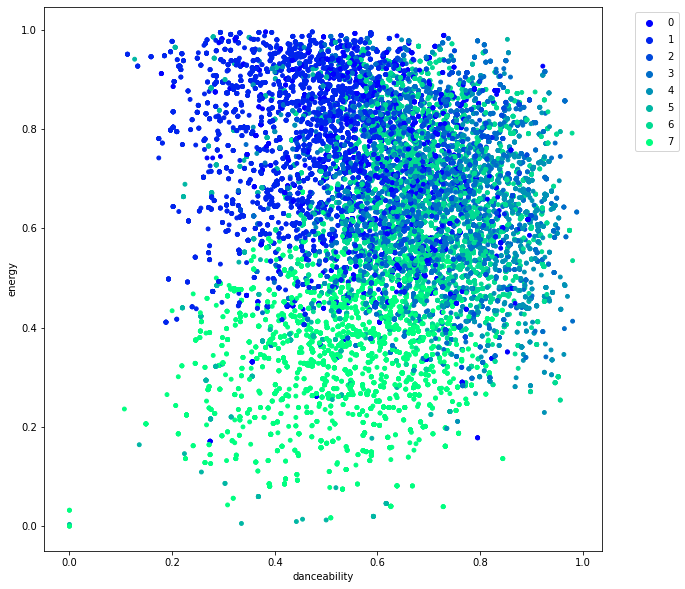

In [8]:
# axes instance
fig = plt.figure(figsize=(10,10))
cmap = 'winter'

# plot
sc = plt.scatter(data['danceability'], data['energy'], s=15, c=data['cluster_num'], marker='o', cmap=cmap, alpha=1)
plt.xlabel('danceability')
plt.ylabel('energy')


# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

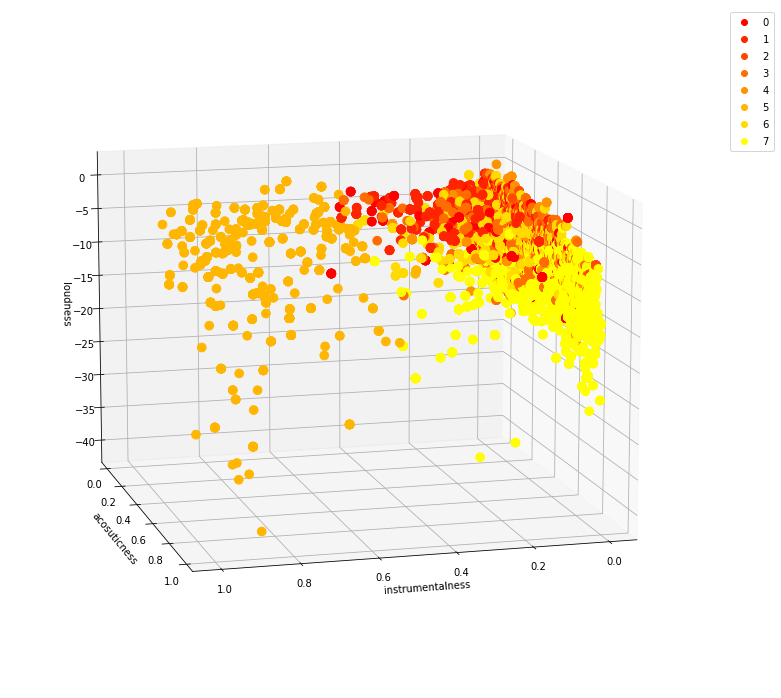

In [9]:
# axes instance
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig, 
            rect = [0, 0, .95, 1], 
            elev = 12, 
            azim = 75,
            auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(data['instrumentalness'], data['acousticness'], 
                data['loudness'], s=75, c=data['cluster_num'], marker='o', cmap='autumn', alpha=1)
ax.set_xlabel('instrumentalness')
ax.set_ylabel('acousticness')
ax.set_zlabel('loudness')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

In [10]:
#creamos un dataset nuevo en el que introducimos de nuevo los parámetros que nos interesaban en la clusterización
data_to_check = data.join([decade, genre, track_name, album_name, artist_name])
data_to_check.head()

,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,cluster_num,decade,genre,track_name,album_name,artist_name
0,85,0.828,0.492,0,-9.744,1,0.0276,0.0644,0.00428,0.128,0.789,120.151,6,1970,album rock,Dreams - 2004 Remaster,Rumours (Super Deluxe),Fleetwood Mac
1,85,0.828,0.492,0,-9.744,1,0.0276,0.0644,0.00428,0.128,0.789,120.151,6,1970,classic rock,Dreams - 2004 Remaster,Rumours (Super Deluxe),Fleetwood Mac
2,85,0.828,0.492,0,-9.744,1,0.0276,0.0644,0.00428,0.128,0.789,120.151,6,1970,mellow gold,Dreams - 2004 Remaster,Rumours (Super Deluxe),Fleetwood Mac
3,85,0.828,0.492,0,-9.744,1,0.0276,0.0644,0.00428,0.128,0.789,120.151,6,1970,rock,Dreams - 2004 Remaster,Rumours (Super Deluxe),Fleetwood Mac
4,85,0.828,0.492,0,-9.744,1,0.0276,0.0644,0.00428,0.128,0.789,120.151,6,1970,soft rock,Dreams - 2004 Remaster,Rumours (Super Deluxe),Fleetwood Mac


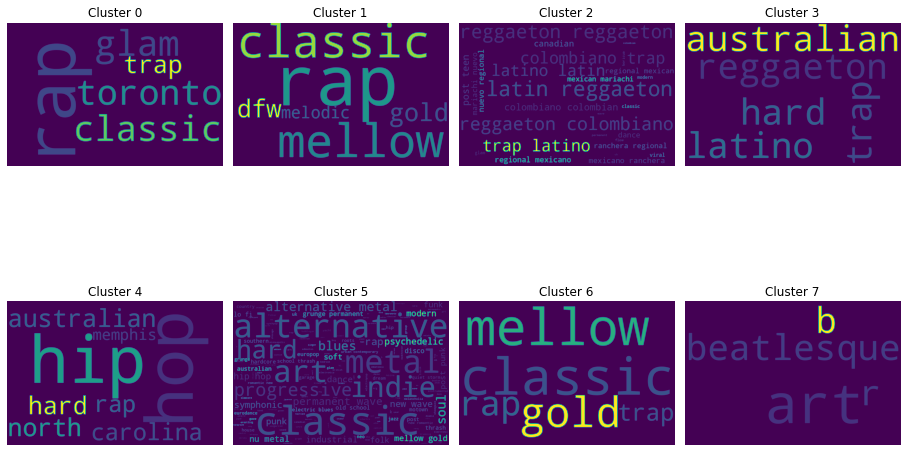

In [11]:
num_clusters = np.unique(data_to_check['cluster_num'])
fig, ax = plt.subplots(int(len(num_clusters)/4),4,figsize=(16,10))

ax = ax.ravel()
ax[-2].set_axis_off()

for i, (cluster, axes) in enumerate(zip(num_clusters, ax)):
    generate_data = data_to_check[data_to_check['cluster_num'].isin([cluster])]
    wc = WordCloud(width=750, height=500, random_state=i, stopwords=['list', "album", "rock", "pop"])
    wc.generate(str(generate_data['genre'].values).replace("'", ""))
    img = wc.to_array()[:,:,0]
    axes.imshow(img) 
    axes.set_axis_off()
    axes.set_title('Cluster {}'.format(cluster))
    
fig.subplots_adjust(wspace=0.05, hspace=0.05)